# Логирование

- это процесс отслеживания событий в программе.
- В Python есть несколько модулей для работы с логированием, таких как `logging` и `syslog`.

Мы будем рассмотривать модуль `logging`. Он предоставляет простой интерфейс для создания и управления логами.
### 1. Создание логгера
Для начала я рекомендую соствлять следующую структуру

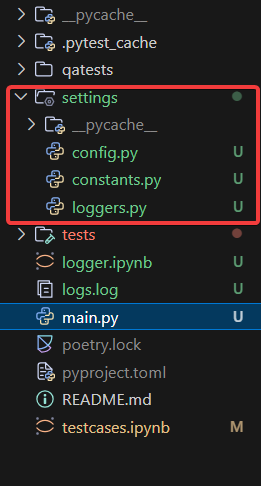

Т.е. мы создаем папку settings, в которой будем хранить настройки всего нашего приложения, включая логеры и переменные константы(это могут быть какие либо токены, ключи для доступа к API, и т.д.).





**Что такое логгирование** -- это процесс отслеживания событий в программе. Это позволяет нам увидеть, что происходит в программе и какие события происходят или произошли в определенное время. Логирование помогает быстро находить ошибки и проблемы в программе.

Как определять логер в проекте:

- **1 способ**: создание общего файла логов (нерекомендуется в больших проекта)

`root` это объект корневого логер который связан с logging бибилиотекой. Именно к root мы обращаемся когда отправляем сигнал через info, warning, error и т.д.

In [2]:
import logging


logging.root.setLevel(logging.INFO) # Выставляем область отлова "сообщений"
file_handler = logging.FileHandler('logs.log') # Выставлем файл для записи логов
# Использование стандартного форматера (UTC время)
file_handler.setFormatter(logging.Formatter("%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s"))
logging.root.addHandler(file_handler) # Добавляем файловый обработчик для записи логов через logging библиотекуэ

logging.info("Starting the application") # Выводим сообщение в консоль и записываем его в файл logs.log


**Форматирование в логере**
- asctime - переменная отвечающая за вермя в формате времени выствленного на устройстве
- module - переменная отвечающая за имя модуля (модуль в котором вызывается функция)
- levelname - переменная отвечающая за уровень важности сообщения (INFO, ERROR, WARNING и т.д.)
- funcName - переменная отвечающая за имя функции
- lineno - переменная отвечающая за номер строки в коде
- message - сообщение которое передано в сигнале к логеру



- **2 способ**: создание отдельных логер обработчиков (лучший вариант использования логеров) в этом случае лучше создавать под все логеры общую папку например `logs`

In [4]:
database_logger = logging.getLogger("database") # Создаем логгер для базы данных "database" просто название
database_logger.setLevel(logging.ERROR)
database_file_logger = logging.FileHandler('logs/database.log') # Создаем файловый обработчик для базы данных "database"
database_file_logger.setFormatter(logging.Formatter("%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s"))
database_logger.addHandler(database_file_logger) # Добавляем файловый обработчик для базы данных "database" в логгер "database"
# С этого момента, мы можем обращаться не к logging а к конкретному объекту


In [10]:
# Допустим мы в другом файле, и мы работаем в файле с базой данных
from settings.loggers import database_logger
database_logger.error('Какое то действие в базе данных')

<u>**ВАЖНО:** Не использовать 2 подхода одновременно. Иначе при использовании первого способа со вторым, всё что записывается в отдельные файлы будут и записывать в общий файл определенный 1 способом</u>

Если использовать стандартный логер, то все время которое там используется будет записывать в формате UTC. Соответственно в отличии от МСК на 3 часа позже. При разборе логов, это может мешать. Чтобы это исправить мы создадим класс-форматер для того чтобы он форматировал время так как нам нужно. 


In [12]:
import datetime
from pytz import timezone # Для работы нужно установить библиотеку pytz

class MoscowTimeFormatter(logging.Formatter): # Наследуемся от стандартного форматера логгера
    
    def formatTime(self, record, datefmt=None): # Далее мы ПЕРЕОПРЕДЕЛЯЕМ метод formatTime, который будет форматировать время в соответствии с нашим МСК временем. 
        record_time = datetime.datetime.fromtimestamp(record.created, tz=timezone('Europe/Moscow')) # Переводим время из timestamp в datetime объект с учетом МСК временной зоны.
        if datefmt: # Нужни ли как то форматировать время по особенному?
            return record_time.strftime(datefmt) #Вывод в формате, который задали.
        return record_time.isoformat() # Вывод в стандартном формате

In [13]:
database_2_logger = logging.getLogger("database2") # Создаем логгер для базы данных "database" просто название
database_2_logger.setLevel(logging.ERROR)
database_2_file_logger = logging.FileHandler('logs/database.log') # Создаем файловый обработчик для базы данных "database"
database_2_file_logger.setFormatter(
    MoscowTimeFormatter(
            fmt="%(asctime)s - %(module)s\n[%(levelname)s] %(funcName)s:\n %(lineno)d - %(message)s",
            datefmt='%m.%d %H:%M:%S'
        )
    )
database_2_logger.addHandler(database_file_logger) # Добавляем файловый обработчик для базы данных "database" в логгер "database"
# С этого момента, мы можем обращаться не к logging а к конкретному объекту


In [1]:
from settings.loggers import database_2_logger

database_2_logger.warning('Предупреждение из программы')
database_2_logger.error("Ошибка")

Для распознования кириллицы нужно выставлять кодирвку, для файла записи, также как мы это делали при работе с файлами.

`database_2_file_logger = logging.FileHandler('logs/database.log', encoding='utf-8')`

Для полноты произошедшей ошибке, в логере рекомендуется использовать модуль traceback для полного вывода traceback ошибки произошедшей во время работы программы

In [3]:
import traceback
from settings.loggers import database_logger

try:
    10 / 0
except:
    database_logger.error(traceback.format_exc())

print('Код дошел до конца')

Код дошел до конца
